In [1]:
%pip install numpy pandas matplotlib scikit-learn h5py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import h5py
import scipy.io
import scipy.stats
import sklearn.metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
featFileName = "./Data/features_combined.csv"
batch_pd = pd.read_csv(featFileName, index_col=False)
batch_pd

,policy,barcode,cycle_life,QD2,QD(Max-2),QD100,QDiffMin,QDiffMean,QDiffVar,QDiffSkew,QDiffKurtosis,QDiffStart,R3Coef,R3Intercept,R1Coef,R1Intercept,QDiffLinVar
0,3_6C-80PER_3_6C,???,1189.0,1.070689,0.468365,1.075913,-2.072648,-2.541602,-5.014861,-0.274041,0.129790,-4.261444,-0.000210,1.091262,0.000039,1.072078,-5.013791
1,3_6C-80PER_3_6C,???,1178.0,1.075301,0.009288,1.080630,-1.958457,-2.387257,-5.013960,-0.367163,0.012464,-3.803325,0.000006,1.080945,-0.000041,1.084710,-5.017121
2,3_6C-80PER_3_6C,???,1176.0,1.079922,0.008131,1.084940,-1.764058,-2.348070,-4.737000,0.033502,-0.457627,-5.056484,0.000011,1.084826,-0.000044,1.089331,-4.734378
3,4C-80PER_4C,???,1225.0,1.079723,0.006530,1.084750,-1.722149,-2.127507,-4.442613,-0.357486,0.039579,-3.739833,0.000018,1.084053,-0.000003,1.085031,-4.438865
4,4C-80PER_4C,???,1226.0,1.078417,0.005900,1.082646,-1.855177,-2.240332,-4.647744,-0.440634,0.125101,-4.380559,0.000020,1.081850,-0.000033,1.085851,-4.642574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6C_31PER_4_25C,???,462.0,1.073565,0.007075,1.079078,-1.226029,-1.547619,-3.394968,-1.993884,0.134112,-4.417652,0.000013,1.078951,-0.000031,1.082138,-3.391890
76,6C_40PER_4C,???,457.0,1.070887,0.006366,1.076360,-1.244632,-1.577172,-3.452581,-1.389835,0.111612,-4.012170,0.000023,1.075190,-0.000017,1.078153,-3.453071
77,6C_4PER_4_75C,???,487.0,1.070473,0.005186,1.073041,-1.361351,-1.680775,-3.688418,-1.539699,0.113010,-4.279524,-0.000006,1.074844,-0.000079,1.080819,-3.691468
78,6C_52PER_3_5C,???,429.0,1.072614,0.007384,1.079520,-1.219913,-1.521692,-3.368943,-1.205534,0.132095,-4.142284,0.000030,1.077609,-0.000013,1.080783,-3.369759


In [4]:
# feat = batch_pd.drop(['policy','barcode','cycle_life','QDiffLinVar'], axis=1).to_numpy()
feat = batch_pd['QDiffLinVar'].to_numpy()
# feat = np.sort(feat)
# feat = np.flip(feat)
feat

array([-5.01379056, -5.01712106, -4.73437843, -4.43886527, -4.6425745 ,
       -4.17441201, -3.76726435, -3.81605282, -4.05999002, -4.14761399,
       -4.04482464, -4.02145309, -4.10216981, -3.97159103, -3.65299689,
       -3.61843709, -3.36385426, -3.34976931, -4.04361464, -3.94225808,
       -4.03113509, -3.79789787, -3.85155591, -3.84521183, -3.83623068,
       -3.7455051 , -3.77270782, -3.64840009, -3.66719619, -3.84722896,
       -3.76929209, -3.66920184, -3.67613689, -3.43470933, -3.50559594,
       -4.05527305, -4.0689252 , -3.67015204, -3.67099451, -3.41977762,
       -3.42533581, -2.74323225, -2.72538591, -3.49212162, -2.92924628,
       -3.35382244, -3.60581586, -3.24747298, -3.46288879, -3.4949456 ,
       -3.42969537, -3.51760477, -3.31627607, -3.71807958, -3.52019865,
       -3.53047842, -3.69208201, -3.45480802, -3.40814344, -3.56220783,
       -3.52535609, -3.70793825, -3.60640463, -3.62538062, -3.4859852 ,
       -3.68023313, -3.70462348, -3.48878851, -3.5669144 , -3.52

In [5]:
bat_info = batch_pd.loc[:,'policy':'cycle_life']

## Features

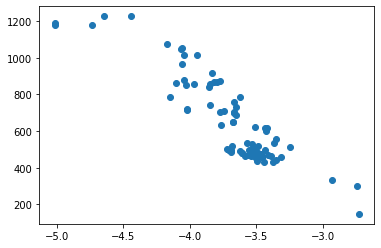

In [6]:
plt.scatter(feat, bat_info["cycle_life"])

plt.show()

## Model Building

In [26]:
# randomly partition into train and test
# feat_train, feat_test, label_train, label_test = train_test_split(
#     feat, np.log10(bat_info["cycle_life"]) ,
#     test_size=0.5
#     # the paper split every other cell, resulting in 50-50 mix
# )
feat_train = np.reshape(feat[0::2], (-1,1))
feat_test = np.reshape(feat[1::2], (-1,1))
label_train = bat_info["cycle_life"][0::2]
label_test = bat_info["cycle_life"][1::2]


array([-5.01379056, -4.73437843, -4.6425745 , -3.76726435, -4.05999002,
       -4.04482464, -4.10216981, -3.65299689, -3.36385426, -4.04361464,
       -4.03113509, -3.85155591, -3.83623068, -3.77270782, -3.66719619,
       -3.76929209, -3.67613689, -3.50559594, -4.0689252 , -3.67099451,
       -3.42533581, -2.72538591, -2.92924628, -3.60581586, -3.46288879,
       -3.42969537, -3.31627607, -3.52019865, -3.69208201, -3.40814344,
       -3.52535609, -3.60640463, -3.4859852 , -3.70462348, -3.5669144 ,
       -3.54087956, -3.55573504, -3.58685841, -3.45307108, -3.36975905])

In [25]:
# scale data
feat_train_scaled = scipy.stats.zscore(feat_train)
feat_test_scaled = scipy.stats.zmap(feat_test, feat_train)

array([-5.01379056, -5.01712106, -4.73437843, -4.43886527, -4.6425745 ,
       -4.17441201, -3.76726435, -3.81605282, -4.05999002, -4.14761399,
       -4.04482464, -4.02145309, -4.10216981, -3.97159103, -3.65299689,
       -3.61843709, -3.36385426, -3.34976931, -4.04361464, -3.94225808,
       -4.03113509, -3.79789787, -3.85155591, -3.84521183, -3.83623068,
       -3.7455051 , -3.77270782, -3.64840009, -3.66719619, -3.84722896,
       -3.76929209, -3.66920184, -3.67613689, -3.43470933, -3.50559594,
       -4.05527305, -4.0689252 , -3.67015204, -3.67099451, -3.41977762,
       -3.42533581, -2.74323225, -2.72538591, -3.49212162, -2.92924628,
       -3.35382244, -3.60581586, -3.24747298, -3.46288879, -3.4949456 ,
       -3.42969537, -3.51760477, -3.31627607, -3.71807958, -3.52019865,
       -3.53047842, -3.69208201, -3.45480802, -3.40814344, -3.56220783,
       -3.52535609, -3.70793825, -3.60640463, -3.62538062, -3.4859852 ,
       -3.68023313, -3.70462348, -3.48878851, -3.5669144 , -3.52

In [9]:
# train model
# Linear Elastic Net with Four-Fold Cross-Validation, alpha = 0.9
# B = linear_model.ElasticNetCV(cv=4, l1_ratio=0.9)

B = linear_model.LinearRegression()
B.fit(feat_train_scaled, label_train)

LinearRegression()

In [10]:
# make predictions
ypred_train = B.predict(feat_train_scaled)
ypred_test = B.predict(feat_test_scaled)

In [11]:
ypred_train

array([1377.82175456, 1225.02167692, 1174.81753046,  696.14304679,
        856.22380151,  847.93042191,  879.29035724,  633.654431  ,
        475.5331077 ,  847.26871757,  840.44411715,  742.23895889,
        733.85816079,  699.11987606,  641.41949941,  697.25194152,
        646.30883303,  553.04634846,  861.11011877,  643.49665736,
        509.15507336,  126.37856951,  237.8622084 ,  607.85288651,
        529.69140031,  511.53915775,  449.51437026,  561.03202393,
        655.02862477,  499.75320981,  563.85243716,  608.17486221,
        542.32196595,  661.88708734,  586.57912678,  572.34164341,
        580.46555357,  597.48576481,  524.32245823,  478.76221882])

In [12]:
label_train.to_numpy()

array([1189., 1176., 1226.,  635., 1053.,  879.,  861.,  690.,  533.,
       1013.,  853.,  841.,  916.,  875.,  756.,  702.,  647.,  624.,
       1050.,  650.,  598.,  148.,  335.,  480.,  477.,  494.,  461.,
        489.,  495.,  471.,  509.,  481.,  519.,  499.,  535.,  465.,
        499.,  466.,  457.,  429.])

## Evaluation

In [13]:
# calculate prediction interval (incomplete)
print(sklearn.metrics.mean_squared_error(label_train, ypred_train, squared=False))
print(sklearn.metrics.mean_squared_error(label_test, ypred_test, squared=False))

100.82988291726143
118.27791580607565


In [14]:
B.score(np.reshape(feat_train_scaled, (-1, 1)), label_train)

0.83779179469243

In [15]:
B.score(np.reshape(feat_test_scaled, (-1,1)), label_test)

0.712831914694277

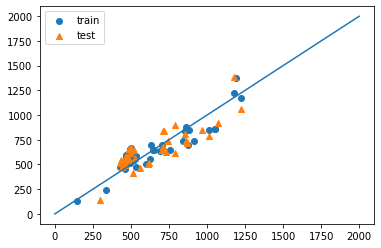

In [16]:
plt.plot(np.arange(2000),np.arange(2000))
plt.scatter(label_train, ypred_train, label="train", marker="o")
plt.scatter(label_test, ypred_test, label="test", marker="^")
plt.legend()
plt.show()

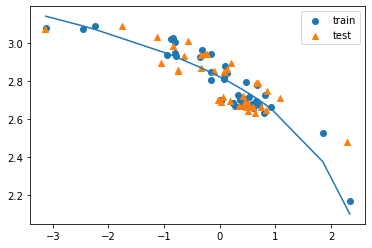

In [17]:
# plt.plot(np.arange(2000),np.arange(2000))
plt.scatter(feat_train_scaled[:,0], np.log10(label_train), label="train", marker="o")
plt.scatter(feat_test_scaled[:,0], np.log10(label_test), label="test", marker="^")
sorting_order = np.argsort(feat_train_scaled[:,0])
plt.plot(feat_train_scaled[:,0][sorting_order], np.log10(ypred_train[sorting_order]))
plt.legend()
plt.show()